# Learning curve

### import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from general_ML_functions import learningCurve

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

In [ ]:
learning_curve()

### import configurations

In [2]:
from config import *

### Load variables stored by data_preproccessing notebook

In [3]:
%store -r my_data_known
%store -r best_feats


### configurations
* save_plots -> boolean
* random_seed_state -> number, sets random state for model and for stratified splits 
* pickle_model -> boolean, wether model should be serialised and saved
* pickle_model_name -> string, name of serialised model
* grid_search -> boolean, if set to true then grid search is performed to identify optimum hyperparamaters for model 
* scale -> boolean, if set to True then features scaled to all have mean value 0 and standard deviation 1
* pickle_file_path -> string, filepath for serialised model to be saved to

In [4]:
save_plots = True
random_seed_state = 42

### counts of instances in all classes before oversampling

In [5]:
my_data_known[target].value_counts()

21    148
4     105
23    105
17    100
22     74
18     61
24     60
0      53
10     47
13     45
16     36
15     36
2      36
5      30
7      30
8      30
11     30
12     30
9      27
6      27
20     27
1      24
14     21
19     18
3      18
Name: class, dtype: int64

### The class column is stored as the variable y and the variables identified as best by the 2 feature_selection notebook are used as features

In [6]:
y = np.array(my_data_known[target])
X = np.array(my_data_known[best_feats])

### call function for plotting learning curve 

In [9]:
rfc_lc = learningCurve(RandomForestClassifier(n_estimators=10, random_state = random_seed_state, n_jobs=-1, 
                              min_samples_split =  3, min_samples_leaf = 1, max_features = 'auto', 
                              max_depth = 100, bootstrap =  True), X, y, cv = 5, train_sizes = np.linspace(0.1, 1.0, 20))

[learning_curve] Training set sizes: [ 96 142 188 233 279 325 371 416 462 508 554 599 645 691 737 782 828 874
 920 966]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished


### visualise learning curve for Random Forest Classifier

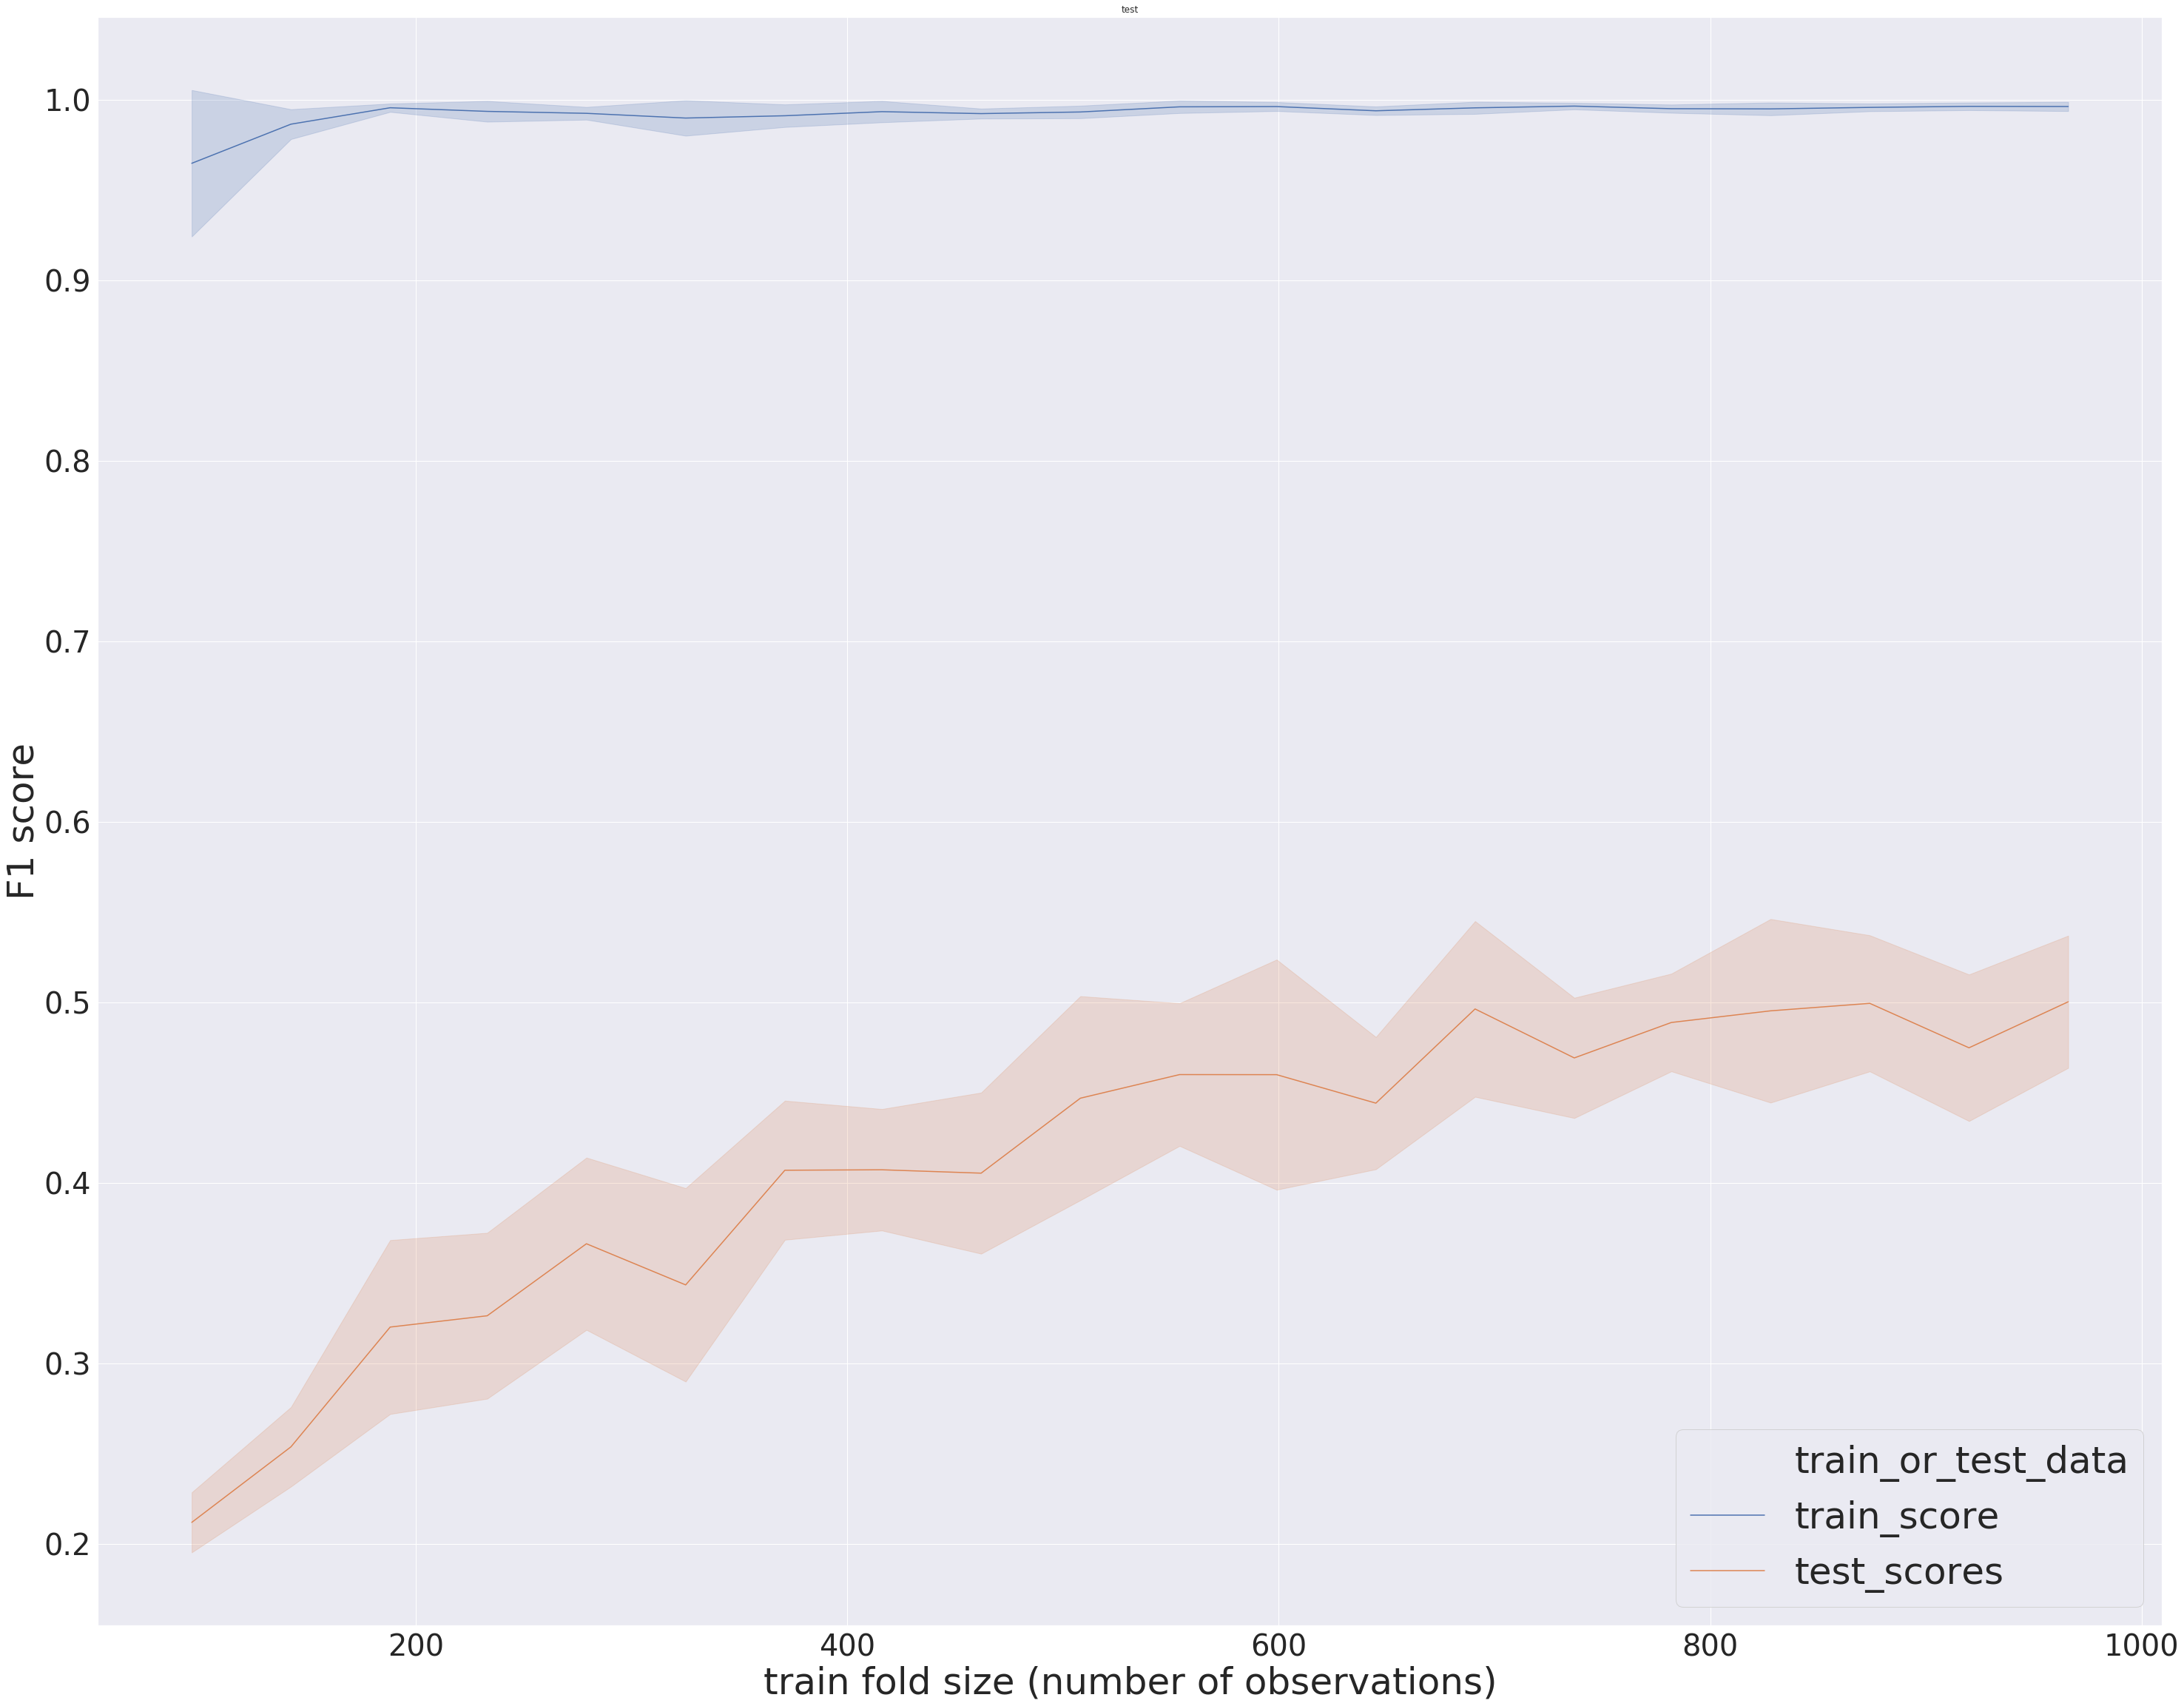

In [10]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.lineplot(x = 'train_sizes', y = 'k_fold_stratified_scores', hue = 'train_or_test_data' ,data = rfc_lc, ci = 'sd', markers = "o")
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("F1 score",fontsize=50)
plot.set_title('test')
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.tick_params(labelsize=40)

plt.legend(fontsize = 50, loc = 4)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('figures/training_curve.png')
